In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scifit.interfaces import generic
from scifit.solvers import linear, scientific, specials

 - Le R2 est utile mais ne dis rien sur la distribution
 - Le chi2 est suffisament sensible pour rejeter un modèle qui a un bon r2
 - Les surface loss doivent s'interpréter avec discernement, les échelles sont importantes
 

In [2]:
class P2(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 2) + b
    
class P3(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 3) + b

class P3b(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.power(x[:, 0], 3) + b * np.power(x[:, 0], 2) + c

class P4(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b):
        return a * np.power(x[:, 0], 4) + b
    
class Pn(generic.FitSolverInterface):
    @staticmethod
    def model(x, n, a, b):
        return a * np.power(x[:, 0], n) + b

class Exp(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.exp(b * x[:, 0]) + c

In [3]:
models = [
    P2(), P3(), P3b(), P4(), Pn(), Exp()
]

In [4]:
labels = {
    "P2": r"$y_0 = a x^2_1 + b$",
    "P3": r"$y_1 = a x^3_1 + b$",
    "P3b": r"$y_2 = a x^3_1 + bx^2_1 + c$",
    "P4": r"$y_3 = a x^4_1 + b$",
    "Pn": r"$y_4 = a x^n_1 + b$",
    "Exp": r"$y_5 = a e^{b x_1} + c$",
}

In [5]:
data = models[0].synthetic_dataset(sigma=0.015, xmin=0.5, xmax=5., resolution=30, parameters=[2.0, 1.0], scale_mode="auto")

2
{}
2
{}
3
{}
2
{}
3
{}
3
{}


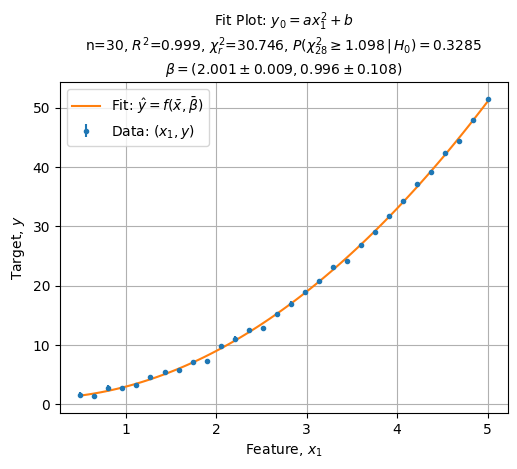

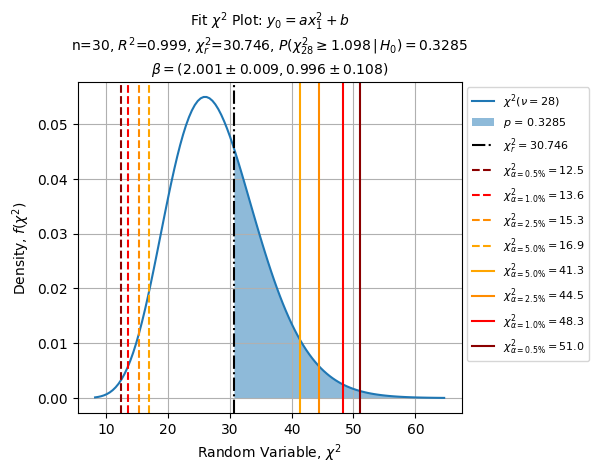

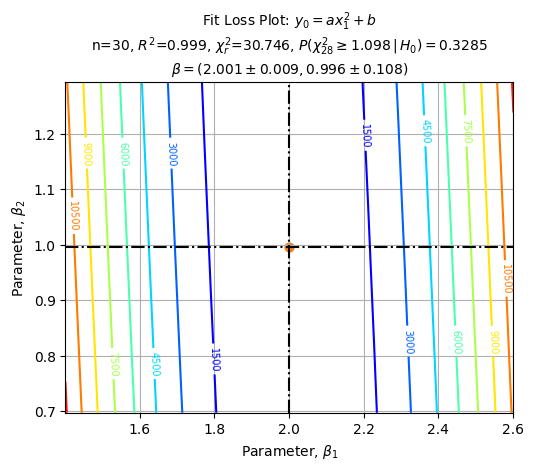

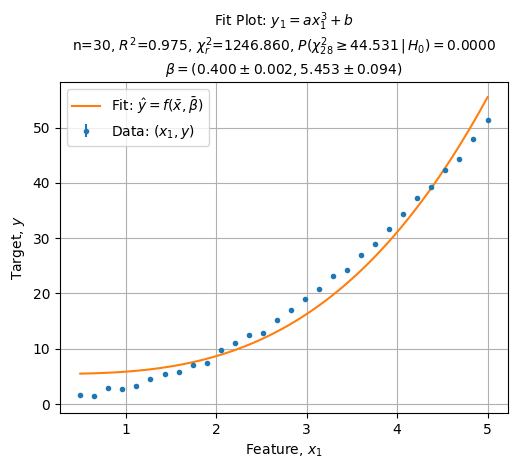

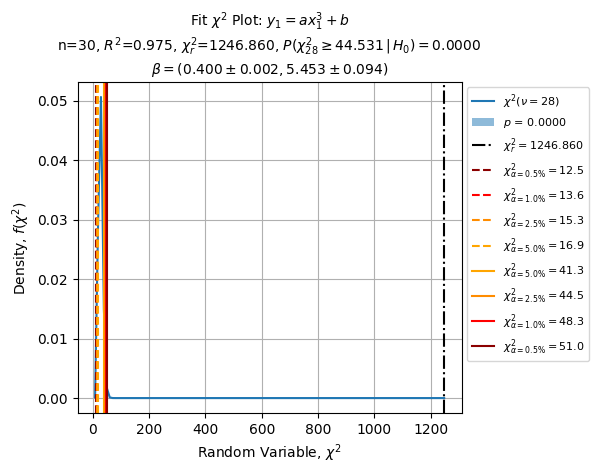

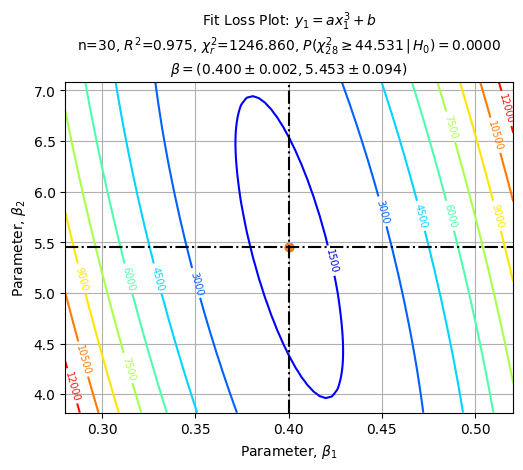

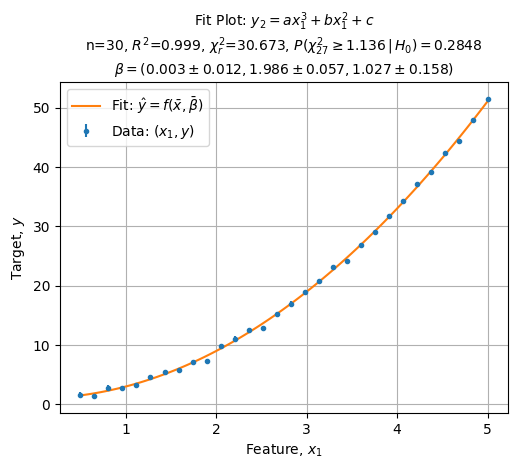

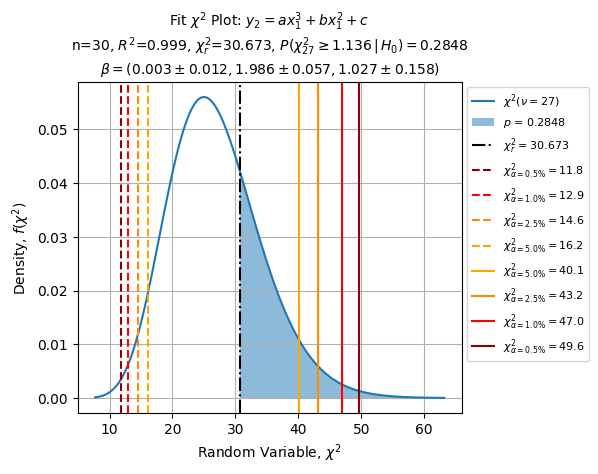

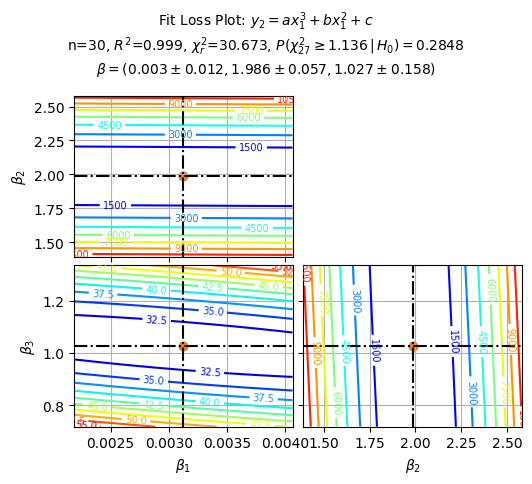

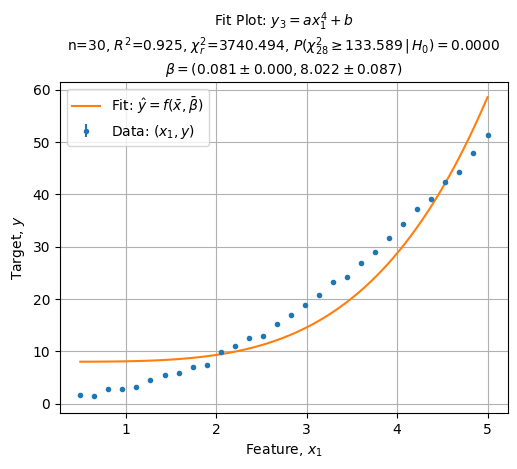

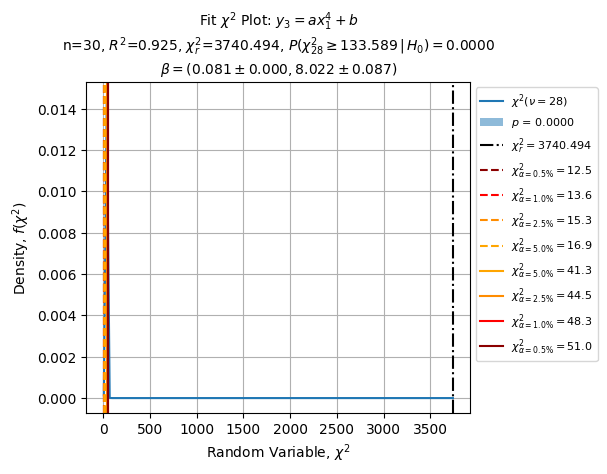

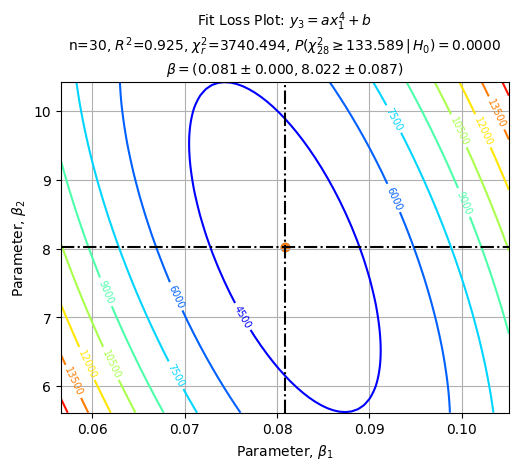

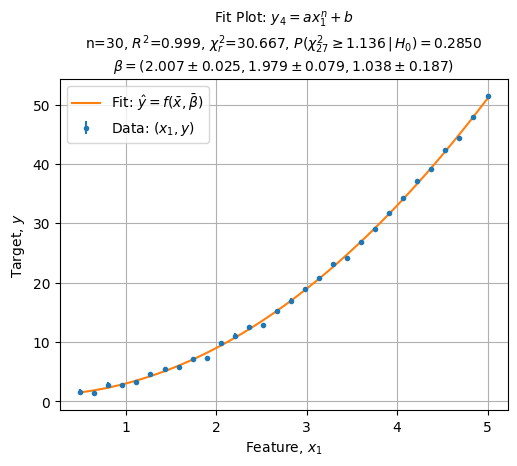

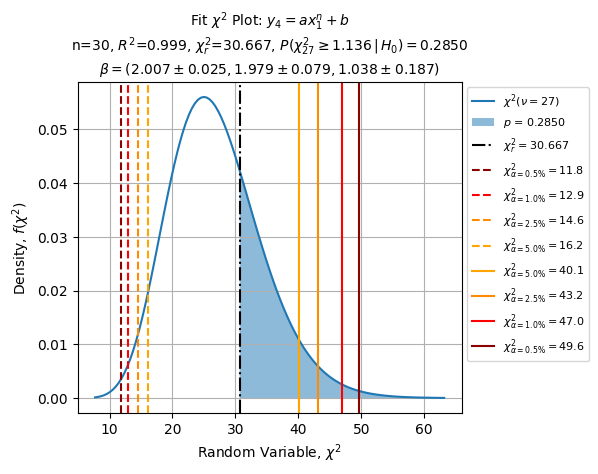

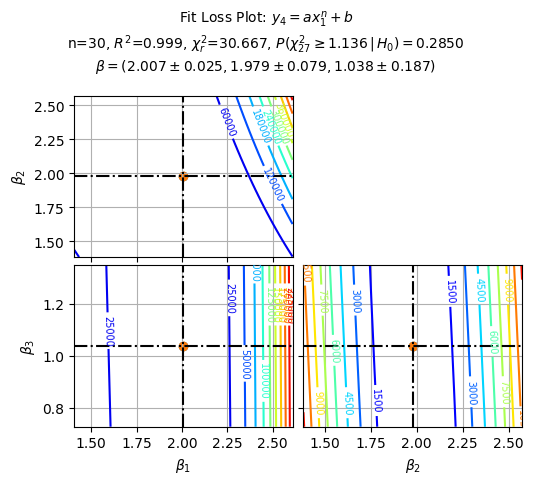

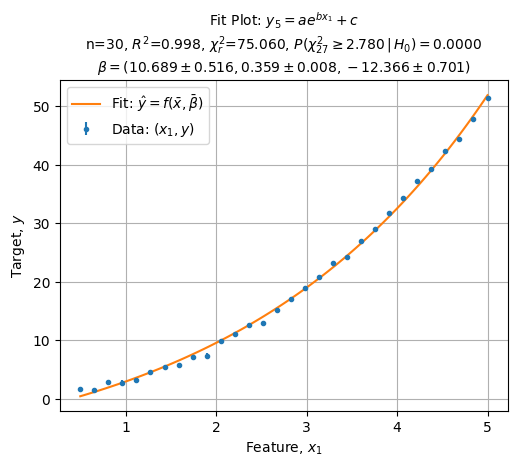

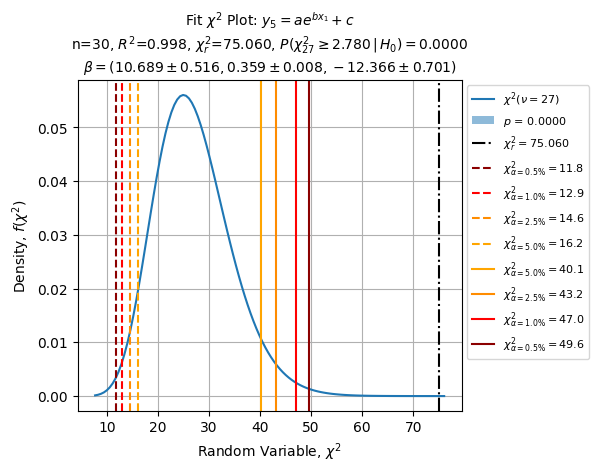

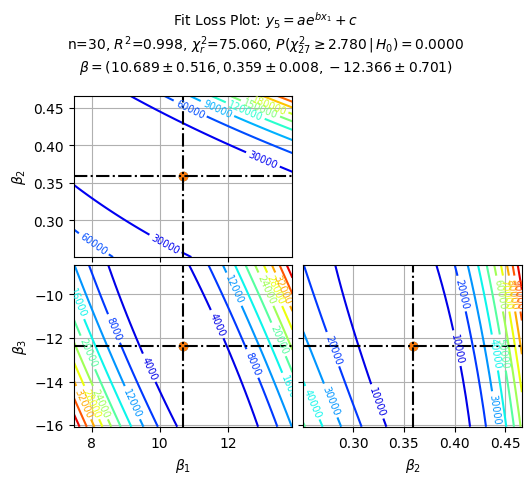

In [6]:
for i, model in enumerate(models):
    
    name = model.__class__.__name__
    title = labels[name]
    file = "InnerFunctionSet_y{}".format(i)
    
    _ = model.load(data)
    sol = model.fit()
    
    axe = model.plot_fit(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_fit.pdf".format(file))
    
    axe = model.plot_chi_square(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_chi2.pdf".format(file))
    
    axe = model.plot_loss(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_loss.pdf".format(file))

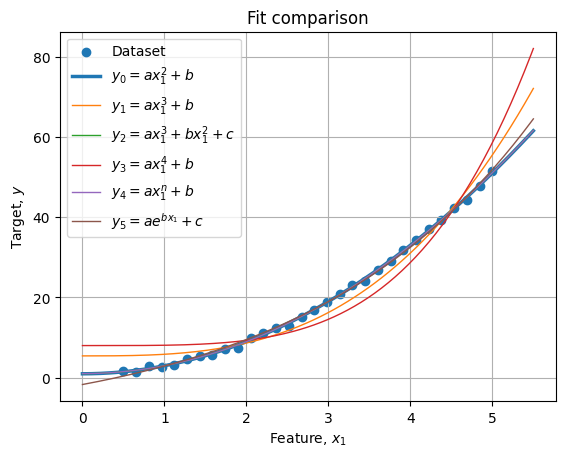

In [7]:
fig, axe = plt.subplots()
xlin = np.linspace(0., 5.5, 200).reshape(-1, 1)
axe.scatter(data["x0"], data["y"], label="Dataset")
for i, model in enumerate(models):
    name = model.__class__.__name__
    label = labels[name]
    axe.plot(xlin, model.predict(xlin), linewidth=2.5 if i == 0 else 1, label=label)
axe.set_title("Fit comparison")
axe.set_xlabel(r"Feature, $x_1$")
axe.set_ylabel(r"Target, $y$")
axe.legend()
axe.grid()

In [8]:
axe.figure.savefig("figures/IntroPolynomial/InnerFunctionSet_yall.pdf")